<a href="https://colab.research.google.com/github/Sweetydutta8/TSF-DataScience_BusinessAnalytics/blob/main/_Task1_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 - Prediction using supervised Machine Learning**
#THE SPARKS FOUNDATION
**Submitted By - Sweety Dutta**

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [29]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

In [30]:
# Reading data from remote link
url = "http://bit.ly/w-data"
score_data = pd.read_csv(url)
print("Data imported successfully")

score_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [31]:
# Let's explore our dataset a bit. Execute the following code to check the shape of the dataset
score_data.shape

(25, 2)

In [32]:
# This dataset has 25 rows and 2 columns.

**Information - Understanding the dtypes,null values in the datasetInformation**

In [33]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Printing the 1st 10 records from the dataset**



In [34]:
# This head() retrieves the first 10 records from the dataset.
score_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


 **Statistical Details**

In [35]:
# To see the statistical details of the dataset, we can use describe()
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**EDA-Univariate Analysis for Distribution plotting of 'Hours'**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


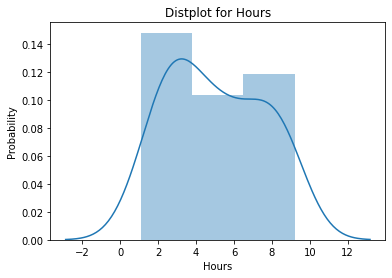

In [37]:
sns.distplot(score_data['Hours'])
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.title('Distplot for Hours')
plt.show()


**Distribution plotting for 'Scores'**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


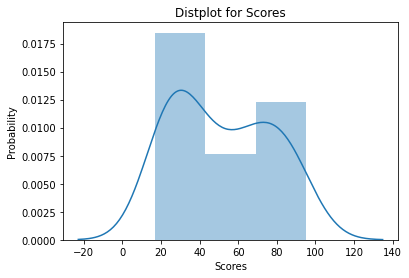

In [38]:
sns.distplot(score_data['Scores'])
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Distplot for Scores')
plt.show()

From both the plots it is observed that the distribution of both the variables is slightly right skewed

**Bivariate Analysis**

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

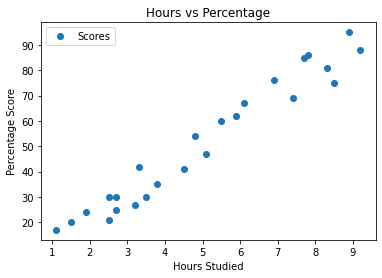

In [9]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

**Multivariate Analysis**

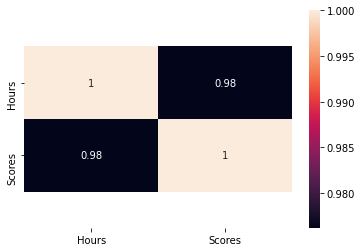

In [39]:
ax=sns.heatmap(score_data.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()


### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

 Attribute variable be Hours column and Target variable is the Scores

In [10]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

**Splitting the Data into train and test**

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [41]:
X_train.shape , X_test.shape

((20, 1), (5, 1))

### **Training the Algorithm using Linear Regression**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


**Plotting the REGRESSION LINE**

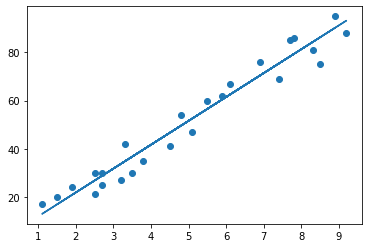

In [13]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [14]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


You can see that the value of root mean squared error is 4.64, 
 which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. 
This means that our algorithm did good work on predictions.

In [21]:
# We can test with some new data 
# lets find the predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737539


In [22]:
# If the student studies for 9.25 hours per day our model predicts the score is 93.6 percentage